# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Primero observare los datos para darme una idea de como vienen. Posterior creare distintos dataframe separados por ";" para el analisis y los mostare con info() y aplicar el metedo head() para ver los datos.

In [1]:
import pandas as pd # importar librerías

In [2]:
df_instacart = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
df_products = pd.read_csv('/datasets/products.csv',sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv',sep=';')
df_departments = pd.read_csv('/datasets/departments.csv',sep=';')
df_order = pd.read_csv('/datasets/order_products.csv',sep=';')
    # leer conjuntos de datos en los DataFrames

In [3]:
df_instacart.info()
df_instacart.head()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
df_products.info()
df_products.head()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
df_aisles.info()
df_aisles.head()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
df_order.info(show_counts=True)
df_order.head()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [7]:
df_departments.info()
df_departments.head()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Conclusiones
Podemos observar en los datos que tenemos valores ausentes en algunos datafreme. Podemos ver que algunos datos tienes un tipo diferente.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución
Voy a revisar las bases de datos y completar o eliminar los valores ausentes dependiendo el tipo de datos con los que estemos trabajando. De igual manera revisaremos los valosres dupliplicados y eliminarlos los que se tengan que eliminar. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
df_instacart.duplicated().sum()
df_instacart[df_instacart.duplicated()]# Revisa si hay pedidos duplicados
#Podemos indentificar que encontramos 13 valores duplicados

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Todos los pedidos duplicados se realizaron a las 2 am.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_instacart[df_instacart['order_hour_of_day']==2]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145,1373529,143518,8,1,2,30.0
169,3129415,201917,4,1,2,8.0
894,2672805,134969,41,0,2,2.0
950,284735,8831,4,5,2,30.0
1260,2537018,7543,23,1,2,3.0
...,...,...,...,...,...,...
477526,2592344,46860,38,3,2,3.0
477624,1448965,201408,4,6,2,30.0
477920,2668224,139740,3,6,2,8.0
478126,852233,71024,1,4,2,NaN


¿Qué sugiere este resultado? Eliminar las filas duplicadas ya que no nos sieven de nada

In [10]:
df_instacart= df_instacart.drop_duplicates()# Elimina los pedidos duplicados


In [11]:
df_instacart.duplicated().sum()# Vuelve a verificar si hay filas duplicadas


0

In [12]:
df_instacart.duplicated(subset='order_id').sum()# Vuelve a verificar si hay IDs duplicados de pedidos

0

Describe brevemente tus hallazgos y lo que hiciste con ellos:
Revisé y elimune los valores duplicados que correspondián al día miercoles a las 2 am. 

### `products` data frame

In [13]:
df_products.duplicated().sum()# Verifica si hay filas totalmente duplicadas


0

In [14]:
df_products['product_id'].duplicated().sum()# Verifica si hay IDs duplicadas de productos

0

In [15]:
df_products['product_name']=df_products['product_name'].str.upper()
df_products['product_name'].duplicated().sum()# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

1361

In [16]:
df_products.duplicated().sum()
df_products[(df_products['product_name'].duplicated()) & (~df_products['aisle_id']==100)]


,product_id,product_name,aisle_id,department_id


Describe brevemente tus hallazgos y lo que hiciste con ellos:
Pudimos indentificar que la mayoria de los nombres de los productos duplicados son de valores ausentes. Y tenemos otros nombres que se repiten pero son diferente id y no podemos eliminar esas filas.

### `departments` data frame

In [17]:
df_departments.duplicated().sum()# Revisa si hay filas totalmente duplicadas

0

In [18]:
df_departments['department_id'].duplicated().sum()# Revisa si hay IDs duplicadas de productos

0

Describe brevemente tus hallazgos y lo que hiciste con ellos:
Revisamos que no hubiera valores duplicados en cada fila y tambien en la columna de id.

### `aisles` data frame

In [19]:
df_aisles.duplicated().sum()# Revisa si hay filas totalmente duplicadas

0

In [20]:
df_aisles['aisle_id'].duplicated().sum()# Revisa si hay IDs duplicadas de productos

0

Describe brevemente tus hallazgos y lo que hiciste con ellos:
Revisamos de igual manera los valores ausentes de el dataframe y de la columna id.

### `order_products` data frame

In [21]:
df_order.duplicated().sum()# Revisa si hay filas totalmente duplicadas


0

In [22]:
df_order['order_id'].duplicated().sum() #Vuelve a verificar si hay cualquier otro duplicado engañoso


4094961

Describe brevemente tus hallazgos y lo que hiciste con ellos:
Podemos observar que los numeros de orden se repiten, ya que en una misma compra se agregan varios productos. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
df_products[df_products['product_name'].isna()]# Encuentra los valores ausentes en la columna 'product_name'

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos. Podemos observar que los valores ausentes de la columna pruduct_name coincide con los valores duplicados y se encuentran en el pasillo 100 departamento 21

In [24]:
aisle_100=df_products[df_products['aisle_id']!=100]# ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
aisle_100.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Describe brevemente cuáles son tus hallazgos. Podemos observar que todos los nombres de productos ausentes se encuentran en el pasillo 100.

In [25]:
dep_21= df_products[df_products['department_id']!=21]# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
dep_21.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Describe brevemente cuáles son tus hallazgos. Podemos ver que todos los valores ausentes se encuentran en el departamento 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_products[(df_products['aisle_id']==100) & (df_products['department_id']==21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown',inplace=True)
df_products['product_name'].isna().sum()
df_products[df_products['aisle_id']==100]


,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


Describe brevemente tus hallazgos y lo que hiciste con ellos. Validamos los valores ausentes en todo el dataframe, posterior validamos si la columna de nombre de productos. Donde encontramos que si hay valores ausentes y que coinciden con que estan en el pasillo 100 del departamento 21. Lo cual validamos para que esta información sea correcta. Al final rellenemos los nombres de los productos con la palabra 'Unknown'.

### `orders` data frame

In [28]:
df_instacart.isna().sum()# Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
df_instacart[(df_instacart['order_number']!=1).isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [30]:
#¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_instacart['days_since_prior_order'].fillna(-1,inplace=True)
df_instacart.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos. no hay valores ausentes que no sean la primer compra del dia. Por lo tanto no tenemos valores ausentes, ya que se reemplazn por -1.

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1 </b> <a class="tocSkip"></a>

Buen trabajo en la validación de duplicados y comprobación que la imputación haya sido exitosa.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor - Revisión 1 </b> <a class="tocSkip"></a>

El tratamiento no es del todo adecuado. Para hacer la revisión de si se trata del primer pedido, deberías usar la columna `order_number`.
 
Además, reemplazar con 0 podría estar introduciendo un error. Esto significa que la anterior compra se hizo el mismo día. En estos casos es mejor dejar el faltante, o si se necesita un valor para entrenar un modelo, utilizar un valor distinto del rango de valores esperados, ejemplo -1.


</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 2 </b> <a class="tocSkip"></a>

Muy bien! Ahora esta imputación no genera problemas, separando bien estos datos del resto con valores válidos.
</div>

### `order_products` data frame

In [31]:
df_order.isna().sum()# Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [32]:
print(df_order['add_to_cart_order'].max())# ¿Cuáles son los valores mínimos y máximos en esta columna?
df_order['add_to_cart_order'].min()

64.0


1.0

Descubrimos que tenemos valores ausentes en la 'columna add_to_cart_order' y que el maximo es de 64 y el minimo de 1. Lo que nos dice que ya no cuenta el pedido a partir del producto 64. 

In [33]:
id_pedi = df_order[df_order['add_to_cart_order'].isna()]# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
print(id_pedi)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [34]:
df_order[(df_order['add_to_cart_order']<64).isna()]# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_order.groupby('order_id')['add_to_cart_order'].count()# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
df_order[df_order['order_id'].isin(id_pedi)].groupby('order_id')['add_to_cart_order'].min()# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


Series([], Name: add_to_cart_order, dtype: float64)

Describe brevemente cuáles son tus hallazgos. Se enconraron que todos los valores ausentes se encuentran cuando en el carrito tienes más de 64 productos.

In [35]:
df_order['add_to_cart_order'].fillna(999, inplace= True)# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos: Reemplaze todas las celdas con datos ausentes y los rellene con 999 y posterior validamos que no hubiera valores ausentes. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1 </b> <a class="tocSkip"></a>

Muy buen tratamiento en esta variable! Has realizado muy buen trabajo en la comprobación de la condición de los faltantes.

</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos:
Los datos presentaban algunos problemas de datos duplicados y ausentes. Pudimos indentificar y resolver lso distintos problemas que tenian en los diferentes dataframe. 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print(df_instacart['order_hour_of_day'].max())
print(df_instacart['order_hour_of_day'].min())

23
0


In [37]:
print(df_instacart['order_dow'].max())
print(df_instacart['order_dow'].min())

6
0


Escribe aquí tus conclusiones: Las columnas entran dentro del parametro de las horas y del día. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

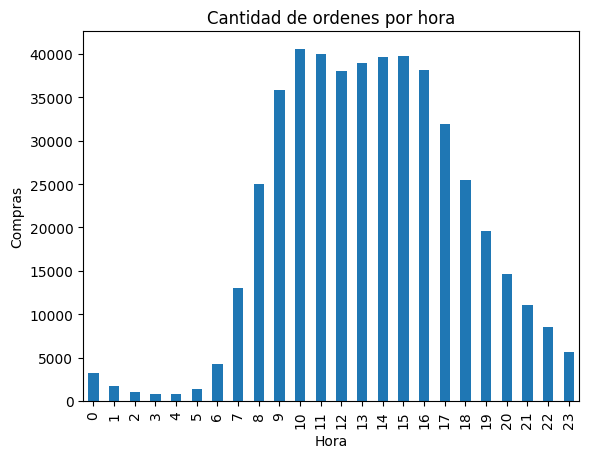

In [38]:
from matplotlib import pyplot as plt

compras_de_cada_dia = df_instacart['order_hour_of_day'].value_counts().sort_index()
#print(compras_de_cada_dia)
compras_de_cada_dia.plot(kind='bar',xlabel= 'Hora', ylabel= 'Compras', title= 'Cantidad de ordenes por hora')
plt.show()

Podemos observar que entre las 10 am y las 4 pm, son las horas que más compra la gente. 

### [A3] ¿Qué día de la semana compran víveres las personas?

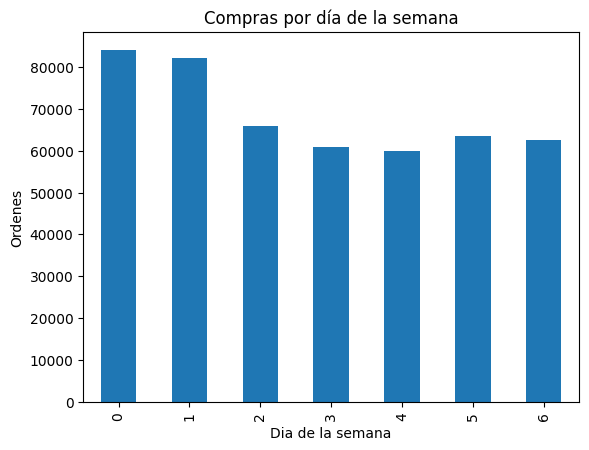

In [39]:
compras_por_dia = df_instacart['order_dow'].value_counts().sort_index()
compras_por_dia.plot(title='Compras por día de la semana', xlabel= 'Dia de la semana', ylabel= 'Ordenes', kind= 'bar')
plt.show()

Escribe aquí tus conclusiones Podemos observar que el día Domingo y Lunes, son los días que más compra las personas.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:title={'center':'Tiempo en hacer otro pedido'}, xlabel='Cantidad de días', ylabel='Ordenes'>

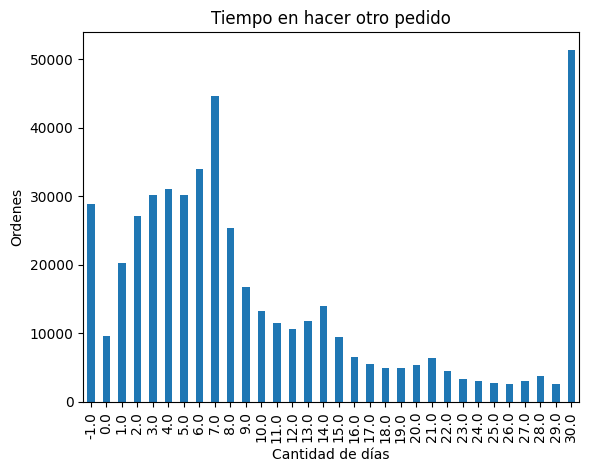

In [40]:
dias_en_comprar = df_instacart['days_since_prior_order'].value_counts().sort_index()
dias_en_comprar.plot(title= 'Tiempo en hacer otro pedido', kind= 'bar',xlabel='Cantidad de días', ylabel= 'Ordenes')

Podemos observar que normalmente las personas tardan en volver a comprar 30 días de necesidad para cada mes, pero hay una tendencia de volver a comprar en los primeros 7 días que podría ser una compra que se realiza cada semana y principalmente el mismo día que se realizo la primer compra. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
miercoles = df_instacart[df_instacart['order_dow']==3]
miercoles = miercoles['order_hour_of_day'].value_counts().sort_index()
print(miercoles)

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64


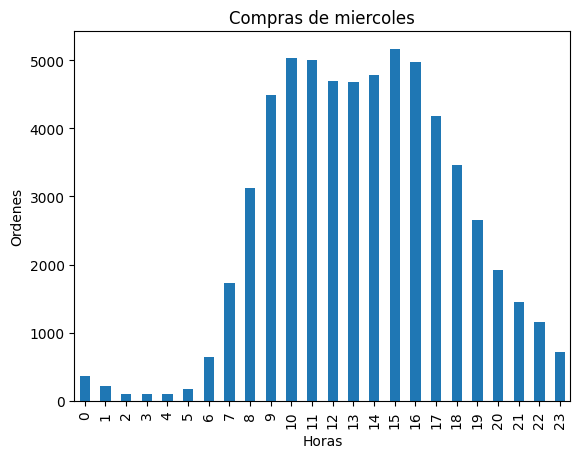

In [42]:
miercoles.plot(kind='bar',title='Compras de miercoles', xlabel='Horas', ylabel= 'Ordenes')
plt.show()

In [43]:
sabado = df_instacart[df_instacart['order_dow']==6]
sabado = sabado['order_hour_of_day'].value_counts().sort_index()
print(sabado)

0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64


Escribe aquí tus conclusiones

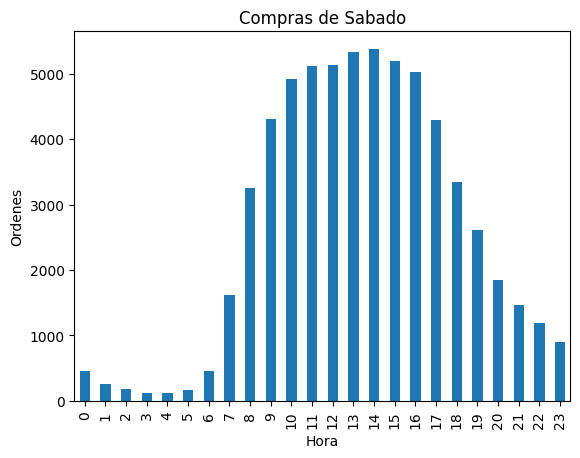

In [63]:
sabado.plot(kind='bar',title= 'Compras de Sabado',xlabel='Hora',ylabel='Ordenes')
plt.show()

Podemos observar que la diferencia de ambos graficos es que entre la 1 y 2 de la tarde del sabado, se invrementan las ventas de mayor manera. Y el miercoles sus picos más importantes son a las 3 y 4 de la tarde.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
distr_clientes = df_instacart['order_number']
#distr_clientes = df_instacart['order_number'].value_counts().sort_index()
print(distr_clientes)

0         11
1          5
2          4
3         56
4          2
          ..
478962     5
478963     2
478964    16
478965     3
478966    18
Name: order_number, Length: 478952, dtype: int64


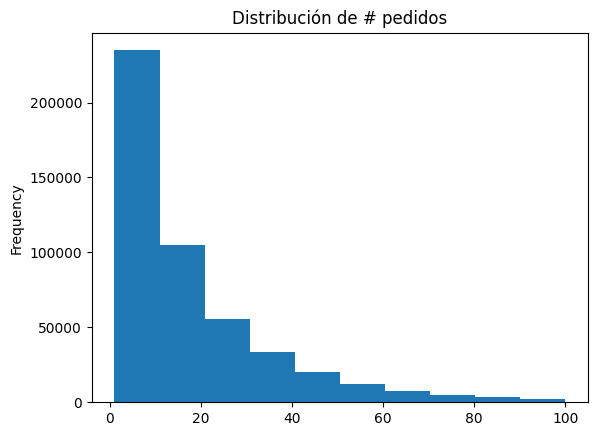

In [46]:
distr_clientes.plot(kind='hist',title='Distribución de # pedidos', xlabel= 'Numero de pedidos(1 al 100)', ylabel='Cantidad de veces pedidas',)
plt.show()

En esta ocación, cree un hsitograma para ver la distribución y la frecuencia con la que piden cierta cantidad de productos. Como podemos ver se repite más veces la compra de 1, 2 y 3 productos que se compran. Eso quiere decir que las personas normalmente compran solo de 1 a 3 productos y va decendiendo la cantida de veces con respecto a la cantidad de productos. Entre más productos, menos veces se repiten esas compras.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
ordenes_productos = df_order.merge(df_products, on='product_id')
ordenes_productos

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7.0,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4.0,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8.0,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23.0,0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14.0,0,SWEET TERIYAKI CHICKEN OVEN SAUCE,5,13
4545003,2621676,25201,10.0,0,CRISP WATERS CANDLE SCENTS,101,17
4545004,937623,49153,2.0,0,SHINE COLLECTION BRILLANCE SHAMPOO,22,11
4545005,532895,8182,1.0,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [48]:
mejores_productos = ordenes_productos.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)
mejores_20_productos = mejores_productos.head(20)
print(mejores_20_productos)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


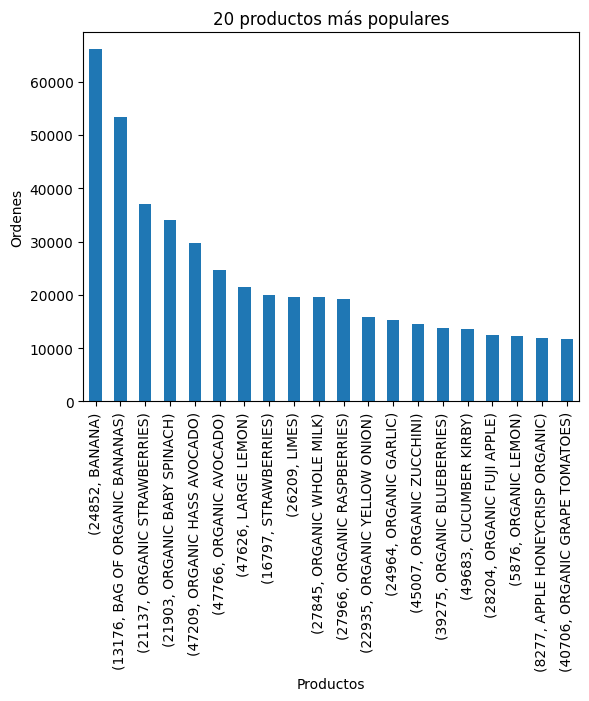

In [49]:
mejores_20_productos.plot(kind='bar',title='20 productos más populares', xlabel= 'Productos', ylabel= 'Ordenes')
plt.show()

Creando en grupo que incluyera el id y el nombre de cada producto. Pudimos hacer una lista de lso 20 mejores prodcutos que se venden. Y mostramos una grafica de los productos y las cantidades. 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [50]:
art_x_persona = ordenes_productos.groupby('order_id')['product_id'].count()

In [51]:
art_x_persona

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

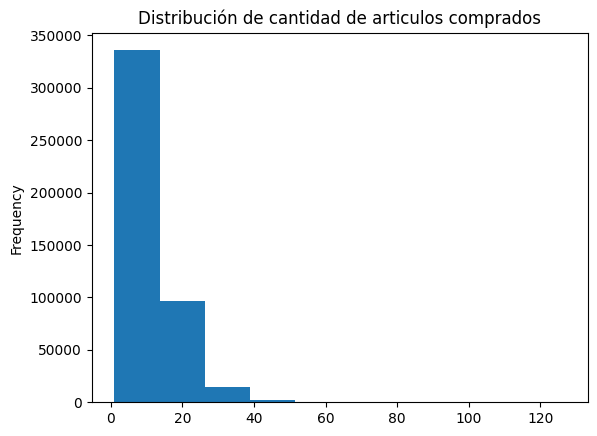

In [52]:
art_x_persona.plot(kind = 'hist',title = 'Distribución de cantidad de articulos comprados', xlabel= 'Cantidad de productos repetidos',ylabel= 'Ordenes')
plt.show()

Escribe aquí tus conclusiones: realizamos un histograma para revisar la distribución de la cantidad de articulos que compra los usuarios en su compra. Podemos ver que hay una tendencia a la baja con respecto a la cantidad de productos en cada orden. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [53]:
frecuencia_compra = ordenes_productos[ordenes_productos['reordered'] == 1] .groupby(['product_id',
'product_name']) ['order_id']. count().sort_values (ascending=False)
print(frecuencia_compra)


product_id  product_name                                 
24852       BANANA                                           55763
13176       BAG OF ORGANIC BANANAS                           44450
21137       ORGANIC STRAWBERRIES                             28639
21903       ORGANIC BABY SPINACH                             26233
47209       ORGANIC HASS AVOCADO                             23629
                                                             ...  
7092        MELATONIN NUTRASPRAY SUBLINGUAL ORANGE FLAVOR        1
21003       WHITE CHOCOLATE MACADAMIA COFFEE CREAMER             1
32856       CRAB RANGOON                                         1
42727       CHOCOLATE LOVERS CHIPS DELUXE COOKIES                1
24091       GARLIC MILL SPICES                                   1
Name: order_id, Length: 36228, dtype: int64


In [54]:
mejores_20_=frecuencia_compra.head(20)
mejores_20_

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64

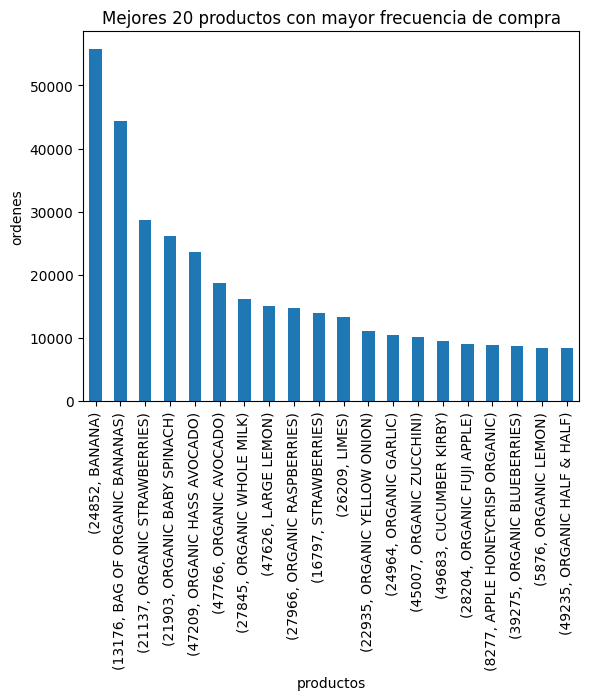

In [55]:
mejores_20_.plot(kind ='bar',xlabel= 'productos',ylabel='ordenes',title='Mejores 20 productos con mayor frecuencia de compra')
plt.show()

Escribe aquí tus conclusiones: Descubrimos que los productos que se compran con mayor frecuencia son casi los mismos que más se consumen.

<div class="alert alert-block alert-success">
<b>Comentario del revisor - Revisión 1 </b> <a class="tocSkip"></a>

Excelente análisis y conclusiones!

</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
prop_de_reordenes=ordenes_productos.groupby(['product_id', 'product_name'])['reordered'].mean()

In [57]:
prop_de_20reordenes= prop_de_reordenes.head(20)
prop_de_20reordenes

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           0.564286
2           ALL-SEASONS SALT                                                     0.000000
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 0.738095
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    0.510204
7           PURE COCONUT WATER WITH ORANGE                                       0.500000
8           CUT RUSSET POTATOES STEAM N' MASH                                    0.315789
9           LIGHT STRAWBERRY BLUEBERRY YOGURT                                    0.761905
10          SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE                       0.448071
11          PEACH MANGO JUICE                                                    0.625000
12          CHOCOLATE FUDGE LAYER CAKE                                           0.390244
13          SALINE NAS

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [58]:
produc_clientes=ordenes_productos.merge(df_instacart,on='order_id')
produc_clientes

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17.0,0,CHICKEN BREAST TENDERS BREADED,129,1,58454,25,0,15,8.0
1,2141543,24561,13.0,1,ORGANIC CHEESE FROZEN PIZZA,79,1,58454,25,0,15,8.0
2,2141543,13176,2.0,1,BAG OF ORGANIC BANANAS,24,4,58454,25,0,15,8.0
3,2141543,31869,15.0,1,ORGANIC EDAMAME,116,1,58454,25,0,15,8.0
4,2141543,16759,5.0,1,ORGANIC CARROT BUNCH,83,4,58454,25,0,15,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4545002,1176629,170,1.0,0,SINGLE HERBS GINKGO LEAF DIETARY SUPPLEMENT,47,11,72889,92,4,9,1.0
4545003,3139402,30458,1.0,0,REGULAR MOUTH LIDS WITH BANDS,10,17,196661,4,5,14,24.0
4545004,1859901,10363,1.0,0,100% RAW COCONUT DRINK,98,7,39917,14,1,20,15.0
4545005,1021500,25973,1.0,1,ASSORTMENT BITTERSWEET CHOCOLATE BOX,45,19,160507,3,3,9,2.0


In [66]:
prop_clientes = produc_clientes.groupby(['user_id'])['reordered'].mean()


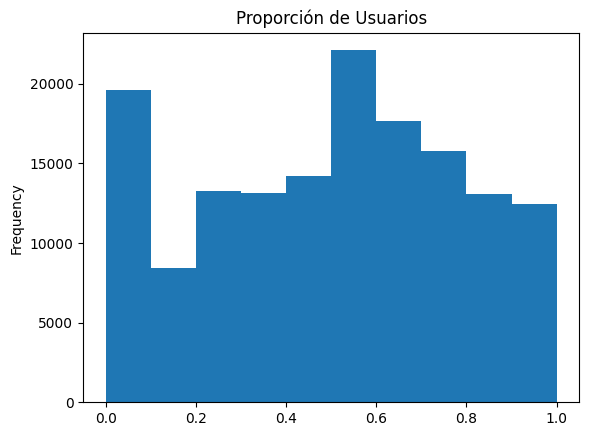

In [70]:
prop_clientes.plot(kind='hist',title ='Proporción de Usuarios',xlabel='Proporción',ylabel='Usuarios')
plt.show()

Escribe aquí tus conclusiones: Podemos observar que La proporción que los usuarios vueven a pedir hay una tendencia en el .5. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [60]:
primer_articulo = produc_clientes[produc_clientes['order_number']==1]

In [61]:
primeros_20_articulos =primer_articulo.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending=False)

In [62]:
primeros_20_articulos.head(20)

product_id  product_name          
24852       BANANA                    4077
13176       BAG OF ORGANIC BANANAS    2670
21137       ORGANIC STRAWBERRIES      2250
21903       ORGANIC BABY SPINACH      2147
47766       ORGANIC AVOCADO           2062
47209       ORGANIC HASS AVOCADO      1576
16797       STRAWBERRIES              1244
26209       LIMES                     1208
47626       LARGE LEMON               1149
27845       ORGANIC WHOLE MILK        1090
24964       ORGANIC GARLIC             958
39275       ORGANIC BLUEBERRIES        943
49683       CUCUMBER KIRBY             934
27966       ORGANIC RASPBERRIES        899
22935       ORGANIC YELLOW ONION       827
4605        YELLOW ONIONS              820
28204       ORGANIC FUJI APPLE         759
5876        ORGANIC LEMON              746
40706       ORGANIC GRAPE TOMATOES     734
45066       HONEYCRISP APPLE           701
Name: order_id, dtype: int64

Escribe aquí tus conclusiones:Podemos ver que de de nuevo el producto que más piden en su primera compra son las bananas. Es muy pareceida a la tendencia de los productos que más se venden y que se repite su compra. 

### Conclusion general del proyecto:

En este analisis, pudimos identificar la tendencia de las compras en la app. Los días que mas se consumen como tambien en los horarios en lso que se consume la mayor cantidad de articulos. Y como la tendencia a que el fin de semana haya un incremento en las compras. De Igual manera pudimos indentificar los productos que más se venden y que los usuarios sulen repetir la compra. Esto nos ayuda a tener información sobre las deciciones que toman las personas al momento de comprar articulos en la app. 